In [1]:
import numpy as np
import pandas as pd

## 十一、Pandas分箱操作

- 分箱操作就是将连续型数据离散化。
- 分箱操作分为等距分箱和等频分箱。

对数据进行分组操作：
- 自动分组: pd.qcut(data, bins)
- 自定义分组: pd.cut(data, bins)
- 对数据进行分组将数据分组一般会与value_counts搭配使用， 统计每组的个数
  - series.value_counts()：统计分组次数
- 注意：分组数据必须是一维的

### 对分好组的数据求哑变量（one-hot编码）

- pandas.get_dummies(data, prefix=None, dtype=int)

  - data:array-like, Series, or DataFrame

  - prefix:分组名字

  - dtype指定独热编码（one-hot）的数据类型，默认是boolean，可以指定为int

In [18]:
data = np.random.randint(0,100,size=(150,3))
df = pd.DataFrame(data=data, columns=['Python','Pandas','PyTorch'])
df

,Python,Pandas,PyTorch
0,48,61,3
1,97,9,9
2,69,34,73
3,41,73,32
4,94,88,44
...,...,...,...
145,2,91,43
146,17,90,84
147,45,21,68
148,49,38,15


- 等宽分箱

In [19]:
# 对Python列进行分箱
df.Python.values

array([48, 97, 69, 41, 94, 36, 79, 52, 12, 83, 89, 90, 23, 63, 36, 11, 96,
       90, 69, 75, 65, 99, 35, 33, 73, 89, 67, 88,  4, 40, 57, 35, 39, 13,
       82, 92, 32, 13, 47, 44, 13, 79, 65, 74, 82, 80, 97, 35, 53, 43, 93,
       98, 80, 15, 75, 39,  1, 44, 86, 60, 81, 39, 99,  8, 63, 83, 52, 74,
        5, 42, 36, 55, 43, 62, 33, 72,  6, 35, 81, 94, 86, 67, 27, 18, 91,
       80, 48, 57, 66, 80, 78, 21, 21, 68, 80, 44, 35, 85, 83, 81, 81, 90,
       32, 71, 64, 95, 26, 85, 25, 74, 33, 54,  6, 39, 78, 96, 70, 92, 57,
       39, 20,  3, 79, 47, 31, 66, 47, 32,  3, 37, 42,  8, 98, 20, 73, 86,
       46, 32, 85, 31, 74, 29, 69, 95, 90,  2, 17, 45, 49, 72],
      dtype=int32)

In [20]:
s = pd.cut(df.Python,bins=4)
s

0       (25.5, 50.0]
1       (74.5, 99.0]
2       (50.0, 74.5]
3       (25.5, 50.0]
4       (74.5, 99.0]
           ...      
145    (0.902, 25.5]
146    (0.902, 25.5]
147     (25.5, 50.0]
148     (25.5, 50.0]
149     (50.0, 74.5]
Name: Python, Length: 150, dtype: category
Categories (4, interval[float64, right]): [(0.902, 25.5] < (25.5, 50.0] < (50.0, 74.5] < (74.5, 99.0]]

<Axes: xlabel='Python'>

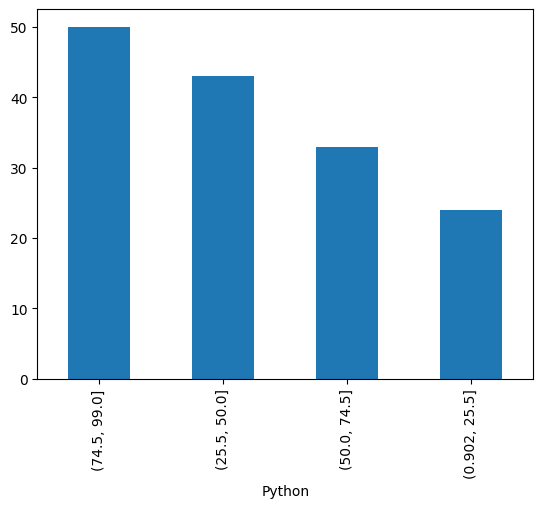

In [21]:
s.value_counts().plot.bar()

0      C
1      A
2      B
3      C
4      A
      ..
145    D
146    D
147    C
148    C
149    B
Name: Python, Length: 150, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

<Axes: xlabel='Python'>

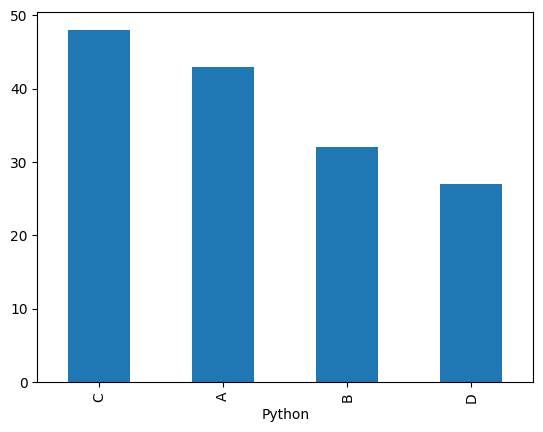

In [23]:
# 指定宽度分箱
s2 = pd.cut(df.Python, # 分箱数据
       bins=[0, 30, 60, 80, 100], # 分箱断点
       right=False, # 左闭右开，默认是左开右闭
       labels=['D','C','B','A']) # 分箱后分类标签
display(s2)
display(s2.value_counts().plot.bar())

In [24]:
# 2、等频分箱
s3 = pd.qcut(df.Python, # 分箱数据
        q=4, # 4等份
        labels=['差', '中', '良', '优']) # 分箱后分类标签
s3

0      中
1      优
2      良
3      中
4      优
      ..
145    差
146    差
147    中
148    中
149    良
Name: Python, Length: 150, dtype: category
Categories (4, object): ['差' < '中' < '良' < '优']

### 对分好组的数据求哑变量（one-hot编码）

- pandas.get_dummies(data, prefix=None, dtype=int)

  - data:array-like, Series, or DataFrame

  - prefix:分组名字

  - dtype指定独热编码（one-hot）的数据类型，默认是boolean，可以指定为int

In [26]:
# 指定宽度分箱
s2 = pd.cut(df.Python, # 分箱数据
       bins=[0, 30, 60, 80, 100], # 分箱断点
       right=False, # 左闭右开，默认是左开右闭
       labels=['D','C','B','A']) # 分箱后分类标签
display(s2)

0      C
1      A
2      B
3      C
4      A
      ..
145    D
146    D
147    C
148    C
149    B
Name: Python, Length: 150, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [27]:
# 转换成one-hot编码
pd.get_dummies(s2, prefix="score", dtype=int)

,score_D,score_C,score_B,score_A
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
145,1,0,0,0
146,1,0,0,0
147,0,1,0,0
148,0,1,0,0
